In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
def get_centroid(bbox):
    """Calculate the centroid of the bounding box."""
    x1, y1, x2, y2 = bbox
    return ((x1 + x2) / 2, (y1 + y2) / 2)

def calculate_direction(df):
    """Calculate the direction of movement based on centroid displacement."""
    directions = []
    movement_detected = False
    displacements = []
    
    for i in range(1, len(df)):
        prev = np.array(df.iloc[i-1])
        curr = np.array(df.iloc[i])
        
        delta_x = curr[0] - prev[0]
        delta_y = curr[1] - prev[1]
        displacement = np.sqrt(delta_x**2 + delta_y**2)
        displacements.append(displacement)

        if displacement == 0:
            directions.append("Stationary")
        else:
            movement_detected = True
            if abs(delta_x) > abs(delta_y):
                directions.append("Right" if delta_x > 0 else "Left")
            else:
                directions.append("Down" if delta_y > 0 else "Up")
    
    directions.insert(0, "Stationary")  # First frame has no previous frame
    displacements.insert(0, 0)  # First frame has no displacement
    return directions, movement_detected, displacements

In [4]:
# Load player positions
with open('../tracker_stubs/player_detections.pkl', 'rb') as f:
    players_positions = pickle.load(f)

In [5]:
# Convert the pickle data into a DataFrame
player_positions_list = []

for frame_dict in players_positions:
    for player_id, bbox in frame_dict.items():
        centroid = get_centroid(bbox)
        player_positions_list.append({"Frame": len(player_positions_list), "Player_ID": player_id, "Centroid_X": centroid[0], "Centroid_Y": centroid[1]})

# Create DataFrame
df = pd.DataFrame(player_positions_list)

# Filter moving players only
moving_players = []

for player_id in df["Player_ID"].unique():
    player_df = df[df["Player_ID"] == player_id].reset_index(drop=True)
    directions, is_moving, displacements = calculate_direction(player_df[["Centroid_X", "Centroid_Y"]])
    df.loc[df["Player_ID"] == player_id, "Direction"] = directions
    df.loc[df["Player_ID"] == player_id, "Displacement"] = displacements
    
    if is_moving and np.mean(displacements) > 1:  # Threshold to detect significant movement
        moving_players.append(player_id)

# Keep only moving players
df = df[df["Player_ID"].isin(moving_players)]


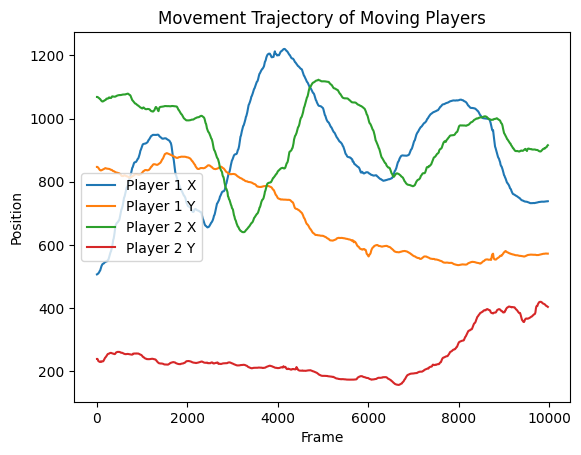

Moving Players: [1, 2]
    Frame  Player_ID   Direction  Displacement
0       0          1  Stationary      0.000000
1       1          2  Stationary      0.000000
10     10          1       Right      0.703080
11     11          2        Down      0.090027
20     20          1       Right      1.957490
21     21          2          Up      2.975286
30     30          1          Up      1.700596
31     31          2          Up      4.066215
40     40          1          Up      2.888819
41     41          2          Up      1.387475
50     50          1       Right      2.976324
51     51          2          Up      1.392904
60     60          1       Right      4.199825
61     61          2        Left      1.940417
70     70          1       Right      1.472950
71     71          2        Left      0.660652
80     80          1       Right      4.910070
81     81          2        Left      2.249962
90     90          1       Right      4.354233
91     91          2        Left     

In [6]:
# Visualization
for player_id in moving_players:
    player_df = df[df["Player_ID"] == player_id]
    plt.plot(player_df["Frame"], player_df["Centroid_X"], label=f"Player {player_id} X")
    plt.plot(player_df["Frame"], player_df["Centroid_Y"], label=f"Player {player_id} Y")

plt.title("Movement Trajectory of Moving Players")
plt.xlabel("Frame")
plt.ylabel("Position")
plt.legend()
plt.show()

# Output result
print("Moving Players:", moving_players)
print(df[["Frame", "Player_ID", "Direction", "Displacement"]].head(20))

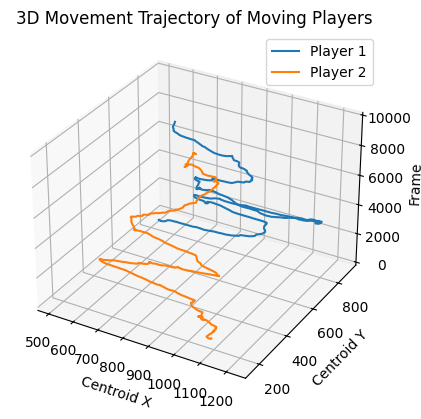

Moving Players: [1, 2]
    Frame  Player_ID   Direction  Displacement
0       0          1  Stationary      0.000000
1       1          2  Stationary      0.000000
10     10          1       Right      0.703080
11     11          2        Down      0.090027
20     20          1       Right      1.957490
21     21          2          Up      2.975286
30     30          1          Up      1.700596
31     31          2          Up      4.066215
40     40          1          Up      2.888819
41     41          2          Up      1.387475
50     50          1       Right      2.976324
51     51          2          Up      1.392904
60     60          1       Right      4.199825
61     61          2        Left      1.940417
70     70          1       Right      1.472950
71     71          2        Left      0.660652
80     80          1       Right      4.910070
81     81          2        Left      2.249962
90     90          1       Right      4.354233
91     91          2        Left     

In [7]:
# 3D Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for player_id in moving_players:
    player_df = df[df["Player_ID"] == player_id]
    ax.plot(player_df["Centroid_X"], player_df["Centroid_Y"], player_df["Frame"], label=f"Player {player_id}")

ax.set_title("3D Movement Trajectory of Moving Players")
ax.set_xlabel("Centroid X")
ax.set_ylabel("Centroid Y")
ax.set_zlabel("Frame")
ax.legend()
plt.show()

# Output result
print("Moving Players:", moving_players)
print(df[["Frame", "Player_ID", "Direction", "Displacement"]].head(20))

In [8]:
# Interactive 3D Visualization with Plotly
fig = px.line_3d(df, x="Centroid_X", y="Centroid_Y", z="Frame", color="Player_ID",
                 title="3D Movement Trajectory of Moving Players")
fig.update_traces(marker=dict(size=4))
fig.show()

# Output result
print("Moving Players:", moving_players)
print(df[["Frame", "Player_ID", "Direction", "Displacement"]].head(20))

Moving Players: [1, 2]
    Frame  Player_ID   Direction  Displacement
0       0          1  Stationary      0.000000
1       1          2  Stationary      0.000000
10     10          1       Right      0.703080
11     11          2        Down      0.090027
20     20          1       Right      1.957490
21     21          2          Up      2.975286
30     30          1          Up      1.700596
31     31          2          Up      4.066215
40     40          1          Up      2.888819
41     41          2          Up      1.387475
50     50          1       Right      2.976324
51     51          2          Up      1.392904
60     60          1       Right      4.199825
61     61          2        Left      1.940417
70     70          1       Right      1.472950
71     71          2        Left      0.660652
80     80          1       Right      4.910070
81     81          2        Left      2.249962
90     90          1       Right      4.354233
91     91          2        Left     